In [70]:
import pickle
import settings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Now read it back and make a prediction
with open('sarima.pkl', 'rb') as pkl:
    pickle_preds, pickle_conf = pickle.load(pkl).predict(n_periods=720, return_conf_int=True,alpha=0.05)

In [101]:
# # MODEL PREDICTIONS
df2 = pd.read_csv(settings.ASSEMBLED_DIR + "\\Test_data2.csv")
Y_test = df2.loc[df2['STATE_VIC']==1, ['DEMAND', 'DATE_x']]
Y_test.set_index(Y_test['DATE_x'], inplace = True)
Y_test.drop(['DATE_x'], axis = 'columns', inplace = True)
Y_test.sort_index(inplace=True)
Actuals_2020 = pd.Series.to_numpy(Y_test['DEMAND'])
forecast_2020 =pickle_preds[366:656] # I have 290 actuals

In [102]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

In [103]:
forecast_accuracy(forecast_2020, Actuals_2020)

{'mape': 0.2566393901786293,
 'me': -20454.249521065834,
 'mae': 27740.91307334702,
 'mpe': 0.06712899140223297,
 'rmse': 36888.99017485549,
 'corr': 0.18829350548101964}

In [104]:
df2 = pd.DataFrame(pickle_conf[366:656], columns=['min', 'max'], index = Y_test.index)
df2['Mean'] = pd.DataFrame(pickle_preds[366:656], columns = ['mean'], index =Y_test.index )
df3 = df2[0:60]

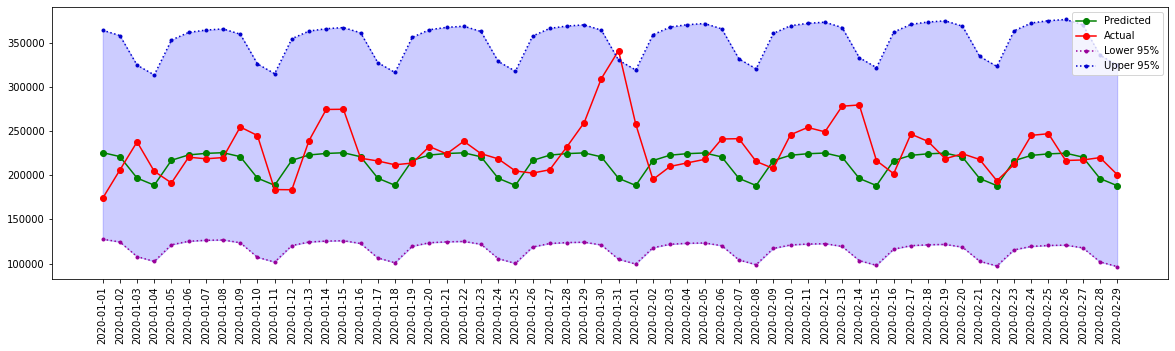

In [105]:
plt.figure(figsize=(20,5))
predicted, = plt.plot(Y_test[0:60].index, df3['Mean'], 'go-', label='Predicted')
actual, = plt.plot(Y_test[0:60].index, Y_test[0:60], 'ro-', label='Actual')
lower, = plt.plot(Y_test[0:60].index, df3['min'], color='#990099', marker='.', linestyle=':', label='Lower 95%')
upper, = plt.plot(Y_test[0:60].index, df3['max'], color='#0000cc', marker='.', linestyle=':', label='Upper 95%')
plt.fill_between(Y_test[0:60].index, df3['min'], df3['max'], color = 'b', alpha = 0.2)
plt.legend(handles=[predicted, actual, lower, upper])
plt.xticks(rotation=90)
plt.show()